# Tratamento de Dados 
### Fonte: https://www.portaltransparencia.gov.br/beneficios/auxilio-emergencial?de=01/02/2022&ate=28/02/2022&tipoBeneficio=6&ordenarPor=beneficiario&direcao=asc

### Auxílio Emergêncial do Fevereiro de 2022
-----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Importando Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importando DataFrame

In [2]:
df = pd.read_csv('emergencial.csv', sep=';', encoding='UTF-8') # importando o CSV

In [3]:
df.head()  # Leitura das 5 primeiras linhas

,CPF Beneficiário,NIS Beneficiário,Beneficiário,Observação,Valor Disponibilizado,Unnamed: 5
0,***.947.052-**,1.242.386.421-5,ABMAEL RODRIGUES DE ARAUJO,Não há,"900,00",NaN
1,***.338.245-**,1.238.500.118-9,ACACIA MARIA SANTIAGO SANTOS,NaN,"6.000,00",NaN
2,***.097.505-**,NaN,ADAILMA OLIVEIRA DE ALMEIDA,Não há,"4.200,00",NaN
3,***.884.115-**,NaN,ADAILSON EVANGELIO DE OLIVEIRA,Não há,"1.200,00",NaN
4,***.082.562-**,NaN,ADAILTON BRAGA NASCIMENTO,Não há,"4.200,00",NaN


# Limpeza dos Dados

In [4]:
df.columns=['CPF_BENEFICIARIO','NIS_BENEFICIARIO', 'BENEFICIARIO', 'OBS','VALOR', 'A']   # renomeando as colunas

In [5]:
df = df.drop(columns=['A']) # dropando a coluna lixo

In [6]:
df.head() #Leitura das 5 primeiras linhas

,CPF_BENEFICIARIO,NIS_BENEFICIARIO,BENEFICIARIO,OBS,VALOR
0,***.947.052-**,1.242.386.421-5,ABMAEL RODRIGUES DE ARAUJO,Não há,"900,00"
1,***.338.245-**,1.238.500.118-9,ACACIA MARIA SANTIAGO SANTOS,NaN,"6.000,00"
2,***.097.505-**,NaN,ADAILMA OLIVEIRA DE ALMEIDA,Não há,"4.200,00"
3,***.884.115-**,NaN,ADAILSON EVANGELIO DE OLIVEIRA,Não há,"1.200,00"
4,***.082.562-**,NaN,ADAILTON BRAGA NASCIMENTO,Não há,"4.200,00"


In [7]:
df.isnull().sum()   #verificando linhas em branco

CPF_BENEFICIARIO       1
NIS_BENEFICIARIO    1262
BENEFICIARIO           0
OBS                  540
VALOR                  0
dtype: int64

In [8]:
df.loc[df.CPF_BENEFICIARIO.isnull(),'CPF_BENEFICIARIO'] = 'SEM CPF'
df.loc[df.NIS_BENEFICIARIO.isnull(),'NIS_BENEFICIARIO'] = 'NÃO INFORMADO'       #Substituindo valores nan
df.loc[df.OBS.isnull(),'OBS'] = 'Não há'

In [9]:
df.isnull().sum()  # Confirmando que não ficou com valores em branco

CPF_BENEFICIARIO    0
NIS_BENEFICIARIO    0
BENEFICIARIO        0
OBS                 0
VALOR               0
dtype: int64

In [10]:
df.info()     # Verificando os types das Colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CPF_BENEFICIARIO  2138 non-null   object
 1   NIS_BENEFICIARIO  2138 non-null   object
 2   BENEFICIARIO      2138 non-null   object
 3   OBS               2138 non-null   object
 4   VALOR             2138 non-null   object
dtypes: object(5)
memory usage: 83.6+ KB


In [11]:
df['VALOR'] = df['VALOR'].str.replace('.','')   # Retirando os pontos das casas decimais

In [12]:
df['VALOR'] = df['VALOR'].str.replace(',','.')  # Depois substuindo a virgula pelo ponto

In [13]:
df['VALOR'] = df['VALOR'].astype(float)  # convertendo em Float 

In [14]:
df.info()    # verificar se deu certo a conversão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CPF_BENEFICIARIO  2138 non-null   object 
 1   NIS_BENEFICIARIO  2138 non-null   object 
 2   BENEFICIARIO      2138 non-null   object 
 3   OBS               2138 non-null   object 
 4   VALOR             2138 non-null   float64
dtypes: float64(1), object(4)
memory usage: 83.6+ KB


<AxesSubplot:>

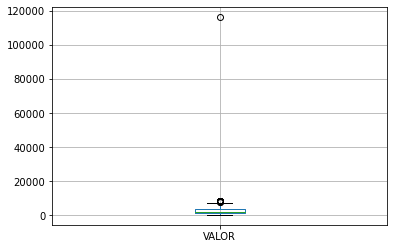

In [15]:
df.boxplot(column=['VALOR']) # Verificando outliers 

In [16]:
df[df.VALOR>100000]   # filtrando outliers 

,CPF_BENEFICIARIO,NIS_BENEFICIARIO,BENEFICIARIO,OBS,VALOR
847,SEM CPF,NÃO INFORMADO,Inválido,Não há,116100.0


In [17]:
df = df.drop(847)   # removendo linha  outliers 

<AxesSubplot:>

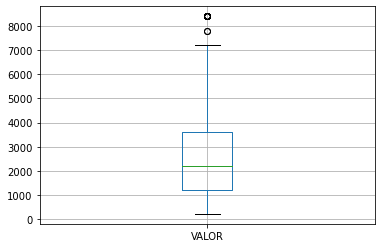

In [18]:
df.boxplot(column=['VALOR'])  # boxplot novamente confirmando a saída do outliers

# Cálculos

In [19]:
df.CPF_BENEFICIARIO.count()   # Número de beneficiários  (02-2022)

2137

In [20]:
 df.VALOR.sum()   # Total Pago R$ 5.067.777,00 Bilhões de Reais  (02-2022)

5067777.0

In [21]:
df.VALOR.mean()  # Média Benecífio Pago  R$ 2.371.44 (02-2022)

2371.444548432382

In [22]:
df.VALOR.max()  # Maior Valor Pago no Mês 02-2022 R$ 8.400,00

8400.0

In [23]:
df.VALOR.min()  # Menor Valor Pago no Mês 02-2022 R$ 221,00

221.0

<AxesSubplot:>

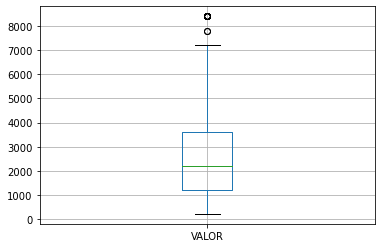

In [24]:
df.boxplot(column=['VALOR'])  # boxplot

In [33]:
df.groupby('VALOR').count().tail()   # Contagem dos maiores valores 

,CPF_BENEFICIARIO,NIS_BENEFICIARIO,BENEFICIARIO,OBS
VALOR,,,,
6000.0,22,22,22,22
6600.0,2,2,2,2
7200.0,15,15,15,15
7800.0,2,2,2,2
8400.0,16,16,16,16


# Desenvolvedor : Pedro Advincula da Silva Neto 
## Email: pedroasn@outlook.com
## Linkedin: https://www.linkedin.com/in/pedro-advincula-da-silva-neto-201487104/